# Capstone 1 - Fraud Amount Visualizations

In [26]:
import helpers as h
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns

data = pd.read_csv("../data/creditcard.csv")

Features = ['V%d' % n for n in range(1, 29)]
df_fraud = data[data['Class']==1]
df_legit = data[data['Class']==0]

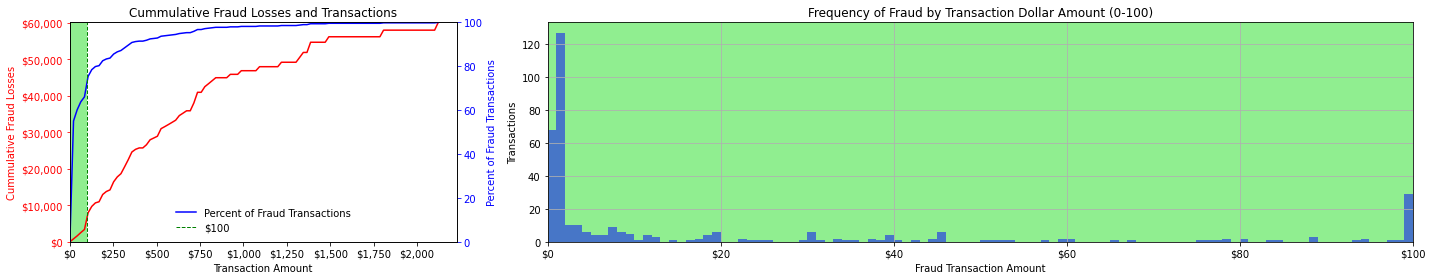

In [42]:
import matplotlib.gridspec as gs
def graph_amount_cdf(ax, x, y1, y2, ymax):
    
    percent =  ticker.FormatStrFormatter('%1.0f')
    currency = mtick.StrMethodFormatter('${x:,.0f}')
    
    ax.plot(x, y1, color='red', label="Cummulative Fraud Loss")
    ax.xaxis.set_major_formatter(currency)
    ax.set_xlabel("Transaction Amount")
    ax.yaxis.set_major_formatter(currency)
    ax.set_ylabel("Cummulative Fraud Losses", c="r")
    ax.tick_params(axis='y', colors='red')

    ax.fill_between(np.arange(0, 100, 1), 0, ymax, facecolor='lightgreen')

    ax.set_xlim(0, right=None)
    ax.set_ylim(0, ymax)
    ax_2 = ax.twinx() 
    ax_2.plot(x, y2, color='blue', label="Percent of Fraud Transactions")
    ax_2.set_ylabel("Percent of Fraud Transactions", color="blue")
    ax_2.yaxis.set_major_formatter(percent)
    ax_2.tick_params(axis='y', colors='blue')
    ax_2.set_ylim(0,100)

    plt.title("Cummulative Fraud Losses and Transactions")
    plt.axvline(x=100, color='green', linestyle='dashed', linewidth=1, label='$100')
    plt.legend(loc='lower center', frameon=False)
    plt.tight_layout() 
    
def amount_cdf_data(data):
    max_amt = data['Amount'].max()
    transaction_cnt = data['Amount'].count()
    x = [n for n in range(1,int(max_amt),int(max_amt/100))]
    y1 = []
    y2 = []
    for n in range(102):
        y1.append(data[data['Amount']<(.01*n*max_amt)]['Amount'].sum())
        y2.append(((data[data['Amount']<(.01*n*max_amt)]['Amount'].count())/transaction_cnt)*100)
    ymax = np.max(y1)
    return x, y1, y2, ymax

def graph_amounts_frequency(ax, data, xlimit):
    gr_data = data.copy()
    gr_data[gr_data['Amount']<xlimit]['Amount'].hist(ax=ax, bins=100, color='blue', alpha=0.5)
    ax.set_title("Frequency of Fraud by Transaction Dollar Amount (0-100)")
    ax.set_xlabel('Fraud Transaction Amount')
    currency = mtick.StrMethodFormatter('${x:,.0f}')
    ax.xaxis.set_major_formatter(currency)
    ax.set_ylabel('Transactions')
    ax.set_xlim(0,100)
    ax.set_facecolor('lightgreen')
    
# amount_cdf_data(df_fraud)
gs = gs.GridSpec(1,3)
fig = plt.figure(figsize=(20,4))

ax1 = fig.add_subplot(gs[0:-2])
x, y1, y2, ymax = amount_cdf_data(df_fraud)
graph_amount_cdf(ax1, x, y1, y2, ymax)

ax2 = fig.add_subplot(gs[1:])
graph_amounts_frequency(ax2, data=df_fraud, xlimit=100)
plt.tight_layout()
fig.savefig("AmountPlots.png")

(0.0, 2.0)

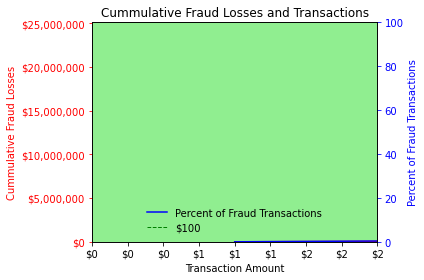

In [45]:
# amount_cdf_data(df_fraud)

fig, ax1 = plt.subplots()
x, y1, y2, ymax = amount_cdf_data(df_legit)
graph_amount_cdf(ax1, x, y1[0:-1], y2[0:-1], ymax)
plt.xlim(0,2)



In [10]:
#  to do - make this into a function and then pass if df_legit and compare the two curves
# annotate matplot image above - At $100: X% of fraud transactions, totaling only $XXX (all in green)

# in body of md file - since 80% of the transactions are below $100, the remaining 20% of the transactions 
# make up 5/6 or 85% of the of the losses.


# what are the fraud rates at $1 and $99.99?
     # explain why the above two anomolies are occurring

# Fraud Rates

In [4]:
print(f"Overall Fraud rate: {100* df_fraud['Amount'].count()/df_legit['Amount'].count()}")

Overall Fraud rate: 0.17304750013189596


In [48]:
fraud = df_fraud[df_fraud['Amount']!=1]['Amount'].count()
legit = df_legit[df_legit['Amount']!=1]['Amount'].count()
print(f"$1 Fraud rate: {100* fraud/legit}")

$1 Fraud rate: 0.13998670310999484


In [23]:
fraud = df_fraud[df_fraud['Amount']==1]['Amount'].count()
legit = df_legit[df_legit['Amount']==1]['Amount'].count()
print(f"$1 Fraud rate: {100* fraud/legit}")

$1 Fraud rate: 0.8324125230202578


In [46]:
fraud = df_fraud[df_fraud['Amount']<=1]['Amount'].count()
legit = df_legit[df_legit['Amount']<=1]['Amount'].count()
print(f"<$10 Fraud rate: {100* fraud/legit}")

<$10 Fraud rate: 0.5971429514037808


In [9]:
fraud = df_fraud[df_fraud['Amount']==99.99]['Amount'].count()
legit = df_legit[df_legit['Amount']==99.99]['Amount'].count()
print(f"$99.99 Fraud rate: {100* fraud/legit}")

$1 Fraud rate: 8.910891089108912


In [13]:
fraud = df_fraud[df_fraud['Amount']>=100]['Amount'].count()
legit = df_legit[df_legit['Amount']>=100]['Amount'].count()
print(f">$100 Fraud rate: {100* fraud/legit}")

<$10 Fraud rate: 0.22705440572875732


In [21]:
fraud = df_fraud[(df_fraud['Amount']>1)&(df_fraud['Amount']<99)]['Amount'].count()
legit = df_legit[(df_legit['Amount']>1)&(df_legit['Amount']<99)]['Amount'].count()
print(f"<$50 Fraud rate: {100* fraud/legit}")

<$50 Fraud rate: 0.07775333776663768


In [ ]:
### will use $20 as model threshold